# Download Data from WRDS

In [3]:
# (id, key) : (yxunwin, Algowin1)

import wrds

conn = wrds.Connection(wrds_username = 'yxunwin')
#conn.create_pgpass_file()

Enter your WRDS username [xunyingluo]:yxunwin
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
conn.describe_table(library = 'taqmsec', table = 'cqm_20180608')
conn.describe_table(library = 'taqmsec', table = 'ctm_20180608')

The row count will return 0 due to the structure of TAQ
There was a problem with retrievingthe row count: 'NoneType' object is not subscriptable
Approximately 0 rows in taqmsec.cqm_20180608.
The row count will return 0 due to the structure of TAQ
There was a problem with retrievingthe row count: 'NoneType' object is not subscriptable
Approximately 0 rows in taqmsec.ctm_20180608.


,name,nullable,type
0,date,True,DATE
1,time_m,True,TIME WITHOUT TIME ZONE
2,ex,True,VARCHAR(1)
3,sym_root,True,VARCHAR(6)
4,sym_suffix,True,VARCHAR(10)
5,tr_scond,True,VARCHAR(4)
6,size,True,NUMERIC
7,price,True,NUMERIC
8,tr_stop_ind,True,VARCHAR(1)
9,tr_corr,True,VARCHAR(2)


# Download Trade data

In [6]:
# WRDS data is stored on Postgres.
# SELECT => pick variable(s), * for all
# FROM => dataset name
# other SQL sytex including, WHERE, ORDER BY, GROUP BY, amd so on

# stmt: SELCT column1, column2, ...
#       From table_name
#       WHERE symbol and time range
import datetime
dates=pd.date_range("1/1/2019","1/31/2019",freq="B").strftime("%Y%m%d")
stocks=["TSLA"]

rawdata_dir="./rawdata/"
tables=conn.list_tables('taqmsec')
# print(tables)

for s in stocks:
    for d in dates:
        if "ctm_{}".format(d) in tables:
            stmt = "SELECT date, time_m, ex, sym_root, size, price \
                    FROM taqmsec.ctm_{} \
                    WHERE sym_root = \'{}\'".format(d,s)
            data =  conn.raw_sql(stmt)
            data.to_csv(rawdata_dir+"taqmsec.ctm_{}_{}.csv".format(d,s))
            print("taqmsec.ctm_{}_{} done.".format(d,s))

taqmsec.ctm_20190102_TSLA done.
taqmsec.ctm_20190103_TSLA done.
taqmsec.ctm_20190104_TSLA done.
taqmsec.ctm_20190107_TSLA done.
taqmsec.ctm_20190108_TSLA done.
taqmsec.ctm_20190109_TSLA done.
taqmsec.ctm_20190110_TSLA done.
taqmsec.ctm_20190111_TSLA done.
taqmsec.ctm_20190114_TSLA done.
taqmsec.ctm_20190115_TSLA done.
taqmsec.ctm_20190116_TSLA done.
taqmsec.ctm_20190117_TSLA done.
taqmsec.ctm_20190118_TSLA done.
taqmsec.ctm_20190122_TSLA done.
taqmsec.ctm_20190123_TSLA done.
taqmsec.ctm_20190124_TSLA done.
taqmsec.ctm_20190125_TSLA done.
taqmsec.ctm_20190128_TSLA done.
taqmsec.ctm_20190129_TSLA done.
taqmsec.ctm_20190130_TSLA done.
taqmsec.ctm_20190131_TSLA done.


In [7]:
from simtools import *
import os
%load_ext autoreload
%autoreload 2

def select_trade_time(tick_data):
    tick_data=tick_data[tick_data.index.hour<16]
    tick_data=tick_data[(tick_data.index.hour*60+tick_data.index.minute)>=(9*60+30)]
    return tick_data

data_dir="./data/"
for s in stocks:
    for d in dates:
        if os.path.exists(rawdata_dir+"taqmsec.ctm_{}_{}.csv".format(d,s)):
            trades=loadtradefile(rawdata_dir+"taqmsec.ctm_{}_{}.csv".format(d,s))
            trades=select_trade_time(trades)
            trades.to_csv(data_dir+"trades_{}_{}.csv".format(d,s))
            print("taqmsec.ctm_{}_{} done.".format(d,s))
            #print(trades.head())

2020-04-25 01:01:51:430680: load trades
2020-04-25 01:01:51:610770: load complete
2020-04-25 01:01:51:610987: indexing trades
2020-04-25 01:01:52:487974: index trades done
taqmsec.ctm_20190102_TSLA done.
2020-04-25 01:01:53:164911: load trades
2020-04-25 01:01:53:281420: load complete
2020-04-25 01:01:53:281644: indexing trades
2020-04-25 01:01:53:603832: index trades done
taqmsec.ctm_20190103_TSLA done.
2020-04-25 01:01:53:962881: load trades
2020-04-25 01:01:54:077530: load complete
2020-04-25 01:01:54:077744: indexing trades
2020-04-25 01:01:54:328545: index trades done
taqmsec.ctm_20190104_TSLA done.
2020-04-25 01:01:54:694834: load trades
2020-04-25 01:01:54:799555: load complete
2020-04-25 01:01:54:799744: indexing trades
2020-04-25 01:01:55:048974: index trades done
taqmsec.ctm_20190107_TSLA done.
2020-04-25 01:01:55:429774: load trades
2020-04-25 01:01:55:520197: load complete
2020-04-25 01:01:55:520398: indexing trades
2020-04-25 01:01:55:745001: index trades done
taqmsec.ctm_

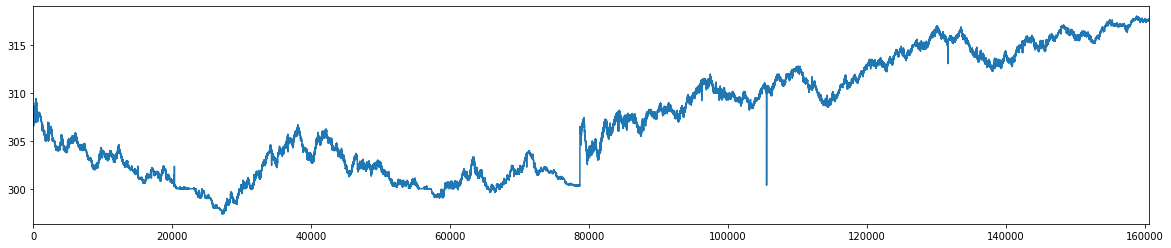

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data_dir="./data/"
trades1=pd.read_csv(data_dir+"trades_20190103_TSLA.csv",index_col=[0],parse_dates=[0])
trades2=pd.read_csv(data_dir+"trades_20190104_TSLA.csv",index_col=[0],parse_dates=[0])
trades=pd.concat([trades1,trades2],axis=0,ignore_index=True)
plt.figure(figsize=(20,4))
trades["trade_px"].plot()

# Check

In [9]:
import yfinance as yf

start_date="2019-01-10"
end_date="2019-01-22"
stocks=["TSLA"]
data = yf.download(stocks, start_date, end_date)
data

ModuleNotFoundError: No module named 'yfinance'

# Download Quote data

In [ ]:
# !pip install wrds

import wrds

conn = wrds.Connection(wrds_username = 'ivanjb')
#conn.create_pgpass_file()

import numpy as np
import pandas as pd
%matplotlib inline

conn.describe_table(library = 'taqmsec', table = 'cqm_20180608')

In [ ]:
import os

# WRDS data is stored on Postgres.
# SELECT => pick variable(s), * for all
# FROM => dataset name
# other SQL sytex including, WHERE, ORDER BY, GROUP BY, amd so on

# stmt: SELCT column1, column2, ...
#       From table_name
#       WHERE symbol and time range
import datetime
dates=pd.date_range("1/1/2019","1/31/2019",freq="B").strftime("%Y%m%d")
stocks=["TSLA"]

rawdata_dir="./rawdata/"
tables=conn.list_tables('taqmsec')
# print(tables)

for s in stocks:
    for d in dates:
        if "cqm_{}".format(d) in tables:
            if not os.path.exists(rawdata_dir+"taqmsec.cqm_{}_{}.csv".format(d,s)):
                stmt = "SELECT date, time_m, ex, bid, bidsiz, ask, asksiz, qu_cond, qu_seqnum, natbbo_ind, \
                qu_cancel, qu_source, sym_root, sym_suffix \
                        FROM taqmsec.cqm_{} \
                        WHERE sym_root = \'{}\'".format(d,s)
                data =  conn.raw_sql(stmt)
                if not data.empty:
                    data.to_csv(rawdata_dir+"taqmsec.cqm_{}_{}.csv".format(d,s))
            print("taqmsec.cqm_{}_{} done.".format(d,s))

In [ ]:
from simtools import *
import os
%load_ext autoreload
%autoreload 2

def select_trade_time(tick_data):
    tick_data=tick_data[tick_data.index.hour<16]
    tick_data=tick_data[(tick_data.index.hour*60+tick_data.index.minute)>=(9*60+30)]
    return tick_data

data_dir="./data/"
for s in stocks:
    for d in dates:
        if os.path.exists(rawdata_dir+"taqmsec.cqm_{}_{}.csv".format(d,s)):
            quotes=loadquotefile(rawdata_dir+"taqmsec.cqm_{}_{}.csv".format(d,s))
            quotes=select_trade_time(quotes)
            
            # Only keep best quotes from NYSE
            quotes=quotes[quotes.natbbo_ind == 4]
            quotes=quotes[quotes.qu_source == 'N']
            
            quotes.to_csv(data_dir+"quotes_{}_{}.csv".format(d,s))
            print("taqmsec.cqm_{}_{} done.".format(d,s))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_dir="./data/"
trades1=pd.read_csv(data_dir+"quotes_20190114_TSLA.csv",index_col=[0],parse_dates=[0])
trades2=pd.read_csv(data_dir+"quotes_20190115_TSLA.csv",index_col=[0],parse_dates=[0])
trades=pd.concat([trades1,trades2],axis=0,ignore_index=True)
print(trades)
plt.figure(figsize=(20,4))
quotes[["bid_px","ask_px"]].plot()